# Linear and Non-Linear Regression
Andrew Zhang(azhang42)

## Linear Regression

First, I will give a breif overview of linear regression. Linear regression is the process of fitting a linear line to a collection of data points. It can be given by the equation $$y=\beta_0+\beta_1x$$, where $\beta_0$ and $\beta_1$ are parameters that are optimized by the linear regression. The the "goodness" of the line is given by a cost function, such as least squares, which is simply the sum of the square between the line and the data points. The goal of linear regression is to minimize the cost function. $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$
We can do this in two main ways. The first way is gradient descent, where we iteratively find the parameters with the lowest cost function. The second way is to use the normal equation, which is a closed form solution to the parameters that minimize the cost function.

### Gradient descent
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Above is the update rule for gradient descent, where $\alpha$ is the learning rate and $\theta$ is a parameter. THe partial derivative for the linear regression is 

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} ((h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)})$$

We update according along this gradient. Youc an image it like walking down a valley along the path of greatest decrease until you reach the bottom.

### Normal Equation
$$\theta = (X^T X)^{-1} X^T y$$

Above is the normal equation or, which is the closed form solution to the parameters. This can be used to find the minimum of the cost function. This is a much faster way to find the parameters, but it is not always possible to use. If the matrix $X^T X$ is not invertible, then the normal equation cannot be used. Furthermore, it cannot be used for more complicated machine learning model such as neural networks.

Now, we will go into a practical exmaple of linear regression. First, we will create a synthetic dataset and visualize it:

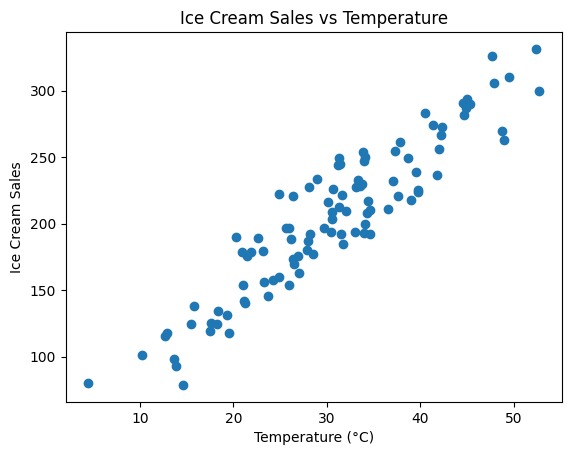

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generating synthetic data
np.random.seed(0)
temperature = np.random.normal(30, 10, 100)
sales = 50 + 5 * temperature + np.random.normal(0, 20, 100)

# Visualizing the data
plt.scatter(temperature, sales)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs Temperature')
plt.show()


Now, let's fit a linear regression model:

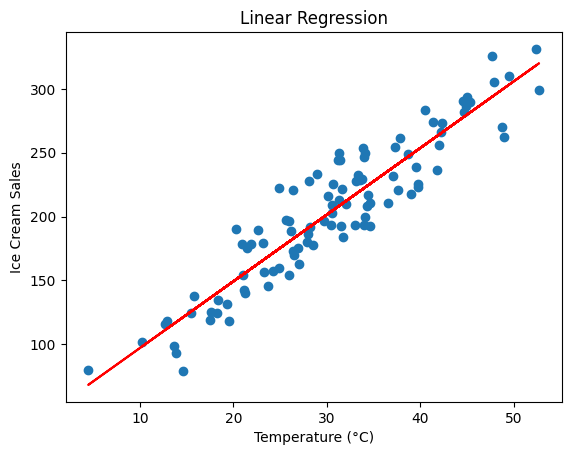

In [2]:
# Reshaping data for modeling
X = temperature.reshape(-1, 1)
y = sales

# Fitting the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predictions and visualization
y_pred = lin_reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Linear Regression')
plt.show()


### Non-Linear Regression

Non-linear regression is the same thing as linear regression, except instead of fitting a linear line to the model, we fit a nonlinear line. We can use the same cost function and gradient descent algorithm as before, but we will need to change the hypothesis function. For example, we can use a quadratic function as the hypothesis function. $$y=\beta_0+\beta_1x+\beta_2x^2$$

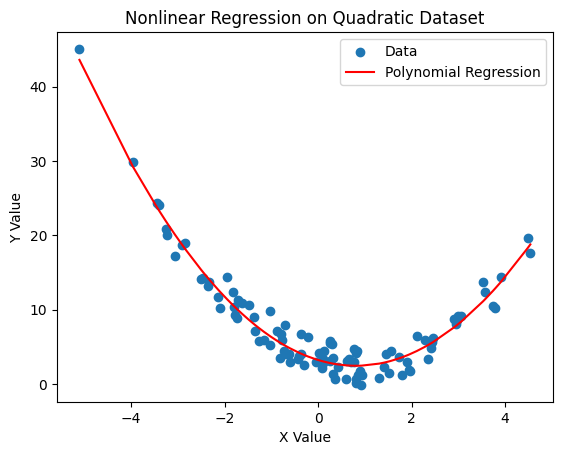

In [3]:
import operator

# Generating a quadratic dataset
np.random.seed(0)
X_sample = np.random.normal(0, 2, 100)
y_sample = 3 - 2 * X_sample + 1.2 * X_sample**2 + np.random.normal(0, 1.5, 100)

# Reshaping the data for modeling
X_sample_reshaped = X_sample.reshape(-1, 1)

# Transforming data for polynomial regression (degree 2)
poly_sample = PolynomialFeatures(degree=2)
X_sample_poly = poly_sample.fit_transform(X_sample_reshaped)

# Fitting the polynomial regression model
poly_reg_sample = LinearRegression()
poly_reg_sample.fit(X_sample_poly, y_sample)

# Predictions for polynomial regression
y_sample_pred = poly_reg_sample.predict(X_sample_poly)

# Sorting values for a smooth polynomial curve
sorted_axis_sample = operator.itemgetter(0)
sorted_zip_sample = sorted(zip(X_sample_reshaped, y_sample_pred), key=sorted_axis_sample)
X_sample_sorted, y_sample_pred_sorted = zip(*sorted_zip_sample)

# Visualizing the quadratic dataset and the polynomial regression model
plt.scatter(X_sample, y_sample, label="Data")
plt.plot(X_sample_sorted, y_sample_pred_sorted, color='red', label="Polynomial Regression")
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Nonlinear Regression on Quadratic Dataset')
plt.legend()
plt.show()